# Hand Written Digit Recognition using Neural Networks

This notebook is created in attemp to participate in a coursera challenge. The data is availble on kaggle.


As usual, import all neccasary stuff into the notebook.

In [2]:
%matplotlib inline 
import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn.model_selection

/Users/theerit/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


First, I will start by loading the data in panda dataframe and do some EDA.

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
print(train.shape,test.shape)

((42000, 785), (28000, 784))


It appears that the test data has no label and seems to serve submission function. Cross validation and model evaluation will be done based on the data provided in Train.csv file only.
Next, split the train,test dataframe into X and Y dataframe where X store the data while Y store the label.

In [4]:
X = train.copy()
X = X.drop('label',axis=1)
Y = pd.DataFrame(train['label'])

In [5]:
print(X.shape,Y.shape)

((42000, 784), (42000, 1))


Lets take a look at class distribution, the distribution is quite uniform so the problem may not need to be treated as imbalance dataset.

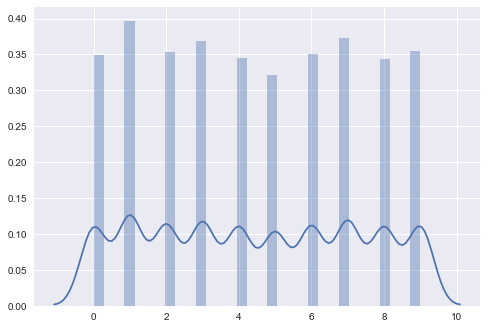

In [6]:
#Y_dist=pd.DataFrame(Y.label.value_counts())
#Y_dist = Y_dist.reset_index()
#Y_dist.columns = ['label','count']
#Y_dist = Y_dist.set_index('label').sort_index().reset_index()
sns.distplot(Y);

Split the data accordingly, test set of 40%

In [7]:
X_train, X_test,Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.4)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

((25200, 784), (25200, 1))
((16800, 784), (16800, 1))


Import and play around with basic neural network using neupy library. Starting with only one layer first.

Change the format of the data to be compatible with neupy library

In [9]:
from sklearn.preprocessing import OneHotEncoder
X_train = X_train/255.
X_train = X_train - X_train.mean(axis=0)
target_scaler = OneHotEncoder()
Y_train = target_scaler.fit_transform(Y_train.values.reshape((-1, 1)))
Y_train = Y_train.todense()

Check the format

In [14]:
print(X_train.shape,Y_train.shape)

((25200, 784), (25200, 10))


In [15]:
import theano
theano.config.floatX = 'float32'

Start one layer neural network training, using adam as back propogation technique.

In [25]:
from neupy import algorithms, layers
network = algorithms.Momentum([layers.Input(784),layers.Relu(784),layers.Softmax(10)],\
                          error='categorical_crossentropy',step = 0.01,verbose=False,\
                          shuffle_data=True)
network.architecture()
network.train(X_train,Y_train,epochs=500)